<a href="https://colab.research.google.com/github/shubov/ai-cup/blob/lstm/Forecastor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

ModuleNotFoundError: ignored

In [ ]:
pip install scalecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.0 MB/s 
     |████████████████████████████████| 216 kB 40.5 MB/s 
     |████████████████████████████████| 133 kB 52.4 MB/s 
  Created wheel for scalecast: filename=SCALECAST-0.11.2-py3-none-any.whl size=70143 sha256=2a0af065f7a67acb7b0e05a7f6671e7a65b5cc01ded18cfa377765795e977a55
  Stored in directory: /root/.cache/pip/wheels/e6/c4/69/ed13be9742c72f1187ab8d02549f61edb4e1026a194e688a32
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=680b8b5e19d4d74f7294fd38238d7dbef99bcefa29cb0bfefd1def6ebb8b331c
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built scalecast eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dep

In [ ]:
from scalecast.Forecaster import Forecaster

In [ ]:
from datetime import datetime

In [ ]:
df=pd.read_csv('/content/train.csv')
df_ = df.drop(columns='pseudo_id')
# convert dates to pandas datetime
df_.columns = [datetime.strptime(c, "%Y-%m-%d %H:%M:%S") for c in df_.columns]
# Aggregate energy use values per day
df_ = df_.T.groupby(df_.T.index.date).sum()

In [ ]:
df_.index=pd.to_datetime(df_.index, unit='D')

In [ ]:
df_.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2019-08-19', '2019-08-20', '2019-08-21', '2019-08-22',
               '2019-08-23', '2019-08-24', '2019-08-25', '2019-08-26',
               '2019-08-27', '2019-08-28'],
              dtype='datetime64[ns]', length=823, freq=None)

In [ ]:
df_=df_.asfreq('d')

In [ ]:
df_.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2019-08-19', '2019-08-20', '2019-08-21', '2019-08-22',
               '2019-08-23', '2019-08-24', '2019-08-25', '2019-08-26',
               '2019-08-27', '2019-08-28'],
              dtype='datetime64[ns]', length=970, freq='D')

In [ ]:
f=Forecaster(y=df_[0], current_dates=df_.index)

In [ ]:
f

Forecaster(
    DateStartActuals=2017-05-28T00:00:00.000000000
    DateEndActuals=2019-08-28T00:00:00.000000000
    Freq=D
    N_actuals=823
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
)

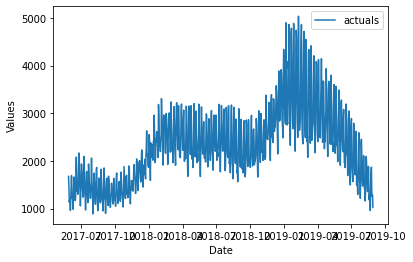

In [ ]:
f.plot()

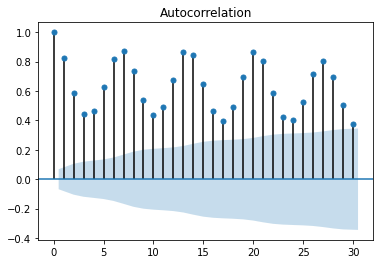

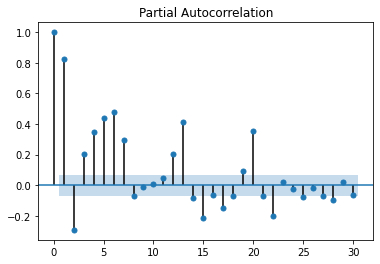

In [ ]:
f.plot_acf()
f.plot_pacf()
plt.show()

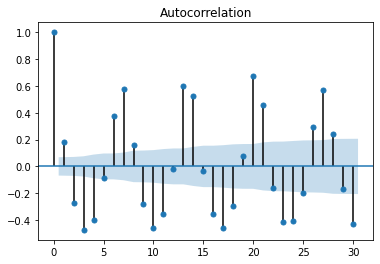

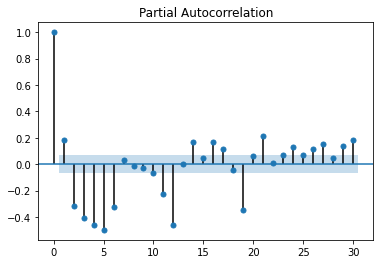

In [ ]:
f.plot_acf(diffy=True)
f.plot_pacf(diffy=True)
plt.show()

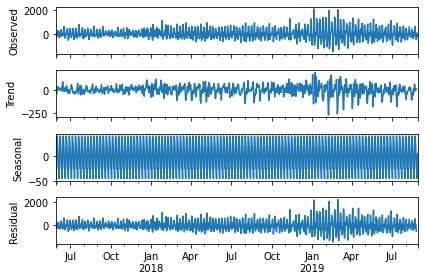

In [ ]:
f.seasonal_decompose(diffy=True).plot()
plt.show()

In [ ]:
f.set_test_length(7)
f.generate_future_dates(7)

In [ ]:
f

Forecaster(
    DateStartActuals=2017-05-28T00:00:00.000000000
    DateEndActuals=2019-08-28T00:00:00.000000000
    Freq=D
    N_actuals=823
    ForecastLength=7
    Xvars=[]
    Differenced=0
    TestLength=7
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
)

In [ ]:
f.set_estimator('lstm')

In [ ]:
f

Forecaster(
    DateStartActuals=2017-05-28T00:00:00.000000000
    DateEndActuals=2019-08-28T00:00:00.000000000
    Freq=D
    N_actuals=823
    ForecastLength=7
    Xvars=[]
    Differenced=0
    TestLength=7
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=lstm
)

26/26 [==============================] - 2s 3ms/step - loss: 0.3320


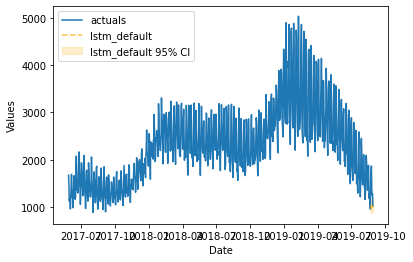

In [ ]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

In [ ]:
first=df_[0][0:38]

In [ ]:
f=Forecaster(y=first, current_dates=first.index)

In [ ]:
f.seasonal_decompose(diffy=True)

In [ ]:
f.set_test_length(7)
f.generate_future_dates(7)

In [ ]:
f.set_estimator('lstm')

1/1 [==============================] - 2s 2s/step - loss: 0.4279


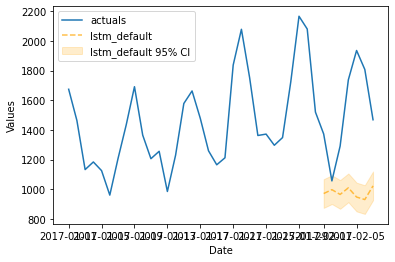

In [ ]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

In [ ]:
f.set_estimator('mlr') # 1. choose the mlr estimator
#f.add_ar_terms(24) # 2. add regressors (24 lagged terms)
#f.add_seasonal_regressors('month','quarter',dummy=True) # 2.
#f.add_seasonal_regressors('year') # 2.
f.add_time_trend() # 2.
f.diff() # 3. difference non-stationary data

CannotDiff: ignored

In [ ]:
f.add_time_trend()

In [ ]:
f

Forecaster(
    DateStartActuals=2017-01-02T00:00:00.000000000
    DateEndActuals=2017-02-07T00:00:00.000000000
    Freq=D
    N_actuals=37
    ForecastLength=7
    Xvars=['t']
    Differenced=1
    TestLength=7
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=['lstm_default']
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=mlr
)

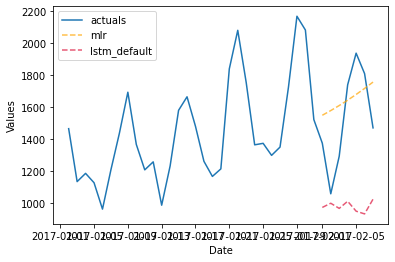

In [ ]:
f.manual_forecast()
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2')

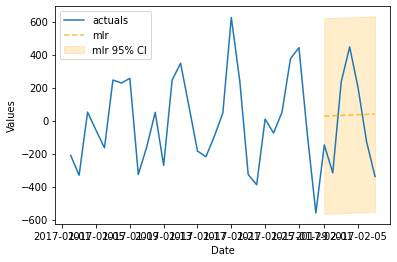

In [ ]:
f.plot_test_set(models='mlr',ci=True)

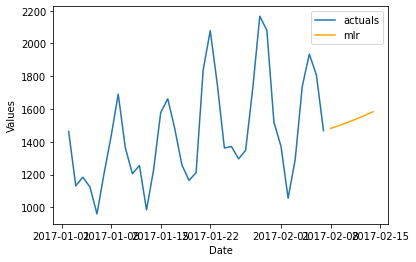

In [ ]:
f.plot(models=['mlr','lstm_best'],
       order_by='LevelTestSetMAPE',
       level=True)

In [ ]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,mlr,0.18581,284.932566,0.044126,True
1,lstm_default,0.33136,626.257138,-3.617659,False
